# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

We import required packages for our project.
We call in our model that we have set up in the py-file.
Moreover, we setup autoreload.

In [1]:

from types import SimpleNamespace

import numpy as np
from scipy import optimize
from scipy.optimize import minimize

import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

class HouseholdSpecializationModelClass:

    def __init__(self):
        """ setup model """

        # a. create namespaces
        par = self.par = SimpleNamespace()
        sol = self.sol = SimpleNamespace()

        # b. preferences
        par.rho = 2.0
        par.nu = 0.001
        par.epsilon = 1.0
        par.omega = 0.5 

        # c. household production
        par.alpha = 0.5
        par.sigma = 1.0

        # d. wages
        par.wM = 1.0
        par.wF = 1.0
        par.wF_vec = np.linspace(0.8,1.2,5)

        # e. targets
        par.beta0_target = 0.4
        par.beta1_target = -0.1

        # f. solution
        sol.LM_vec = np.zeros(par.wF_vec.size)
        sol.HM_vec = np.zeros(par.wF_vec.size)
        sol.LF_vec = np.zeros(par.wF_vec.size)
        sol.HF_vec = np.zeros(par.wF_vec.size)

        sol.beta0 = np.nan
        sol.beta1 = np.nan

    def calc_utility(self,LM,HM,LF,HF):
        """ calculate utility """

        par = self.par
        sol = self.sol

        # a. consumption of market goods
        C = par.wM*LM + par.wF*LF

        # b. home production 
        #H = HM**(1-par.alpha)*HF**par.alpha
        H = None
        if (par.sigma == 1):
            H = HM**(1-par.alpha)*HF**par.alpha
        elif (par.sigma == 0):
            H = min(HM,HF)
        else:
            H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))

        # c. total consumption utility
        Q = C**par.omega*H**(1-par.omega)
        utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)

        # d. disutlity of work
        epsilon_ = 1+1/par.epsilon
        TM = LM+HM
        TF = LF+HF
        disutility = par.nu*(TM**epsilon_/epsilon_+TF**epsilon_/epsilon_)
        
        return utility - disutility

    def solve_discrete(self,do_print=False):
        """ solve model discretely """
        
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()
        
        # a. all possible choices
        x = np.linspace(0,24,49)
        LM,HM,LF,HF = np.meshgrid(x,x,x,x) # all combinations
    
        LM = LM.ravel() # vector
        HM = HM.ravel()
        LF = LF.ravel()
        HF = HF.ravel()

        # b. calculate utility
        u = self.calc_utility(LM,HM,LF,HF)
    
        # c. set to minus infinity if constraint is broken
        I = (LM+HM > 24) | (LF+HF > 24) # | is "or"
        u[I] = -np.inf
    
        # d. find maximizing argument
        j = np.argmax(u)
        
        opt.LM = LM[j]
        opt.HM = HM[j]
        opt.LF = LF[j]
        opt.HF = HF[j]

        # e. print
        if do_print:
            for k,v in opt.__dict__.items():
                print(f'{k} = {v:6.4f}')

        return opt

        
    def solve_continuous(self, do_print=False):
        """solve the model using continuous optimization"""
        # unpack
        par = self.par
        sol = self.sol
        opt3 = SimpleNamespace()

        # constraints
        def constraint1(x):
            LM, HM, LF, HF = x
            return 24 - (LM + HM)
        
        def constraint2(x):
            LM, HM, LF, HF = x
            return 24 - (LF + HF)
        
        constraints = [{'type': 'ineq', 'fun': constraint1},
                    {'type': 'ineq', 'fun': constraint2}]
        
        # defining object
        #obj = lambda x: - self.solve_obj(x)

        # guesses
        guess = [12]*4

        # bounds
        bounds = [(0,24)]*4

        # optimizer 
        result = minimize(self.solve_obj,guess,method='Nelder-Mead', bounds=bounds, constraints=constraints) 


        # results
        opt3.LM=result.x[0]
        opt3.HM=result.x[1]
        opt3.LF=result.x[2]
        opt3.HF=result.x[3]

        # return solution
        return opt3

    def solve_wF_vec(self,discrete=False):
        """ solve model for vector of female wages """

        pass

    def run_regression(self):
        """ run regression """

        par = self.par
        sol = self.sol

        x = np.log(par.wF_vec)
        y = np.log(sol.HF_vec/sol.HM_vec)
        A = np.vstack([np.ones(x.size),x]).T
        sol.beta0,sol.beta1 = np.linalg.lstsq(A,y,rcond=None)[0]
    
    def estimate(self,alpha=None,sigma=None):
        """ estimate alpha and sigma """

        pass

# Question 1

**Explain how you solve the model**

/var/folders/2m/pylrffks44n07rlh7fdg0nr00000gn/T/ipykernel_34745/3348222532.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/2m/pylrffks44n07rlh7fdg0nr00000gn/T/ipykernel_34745/3348222532.py:66: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/2m/pylrffks44n07rlh7fdg0nr00000gn/T/ipykernel_34745/3348222532.py:70: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


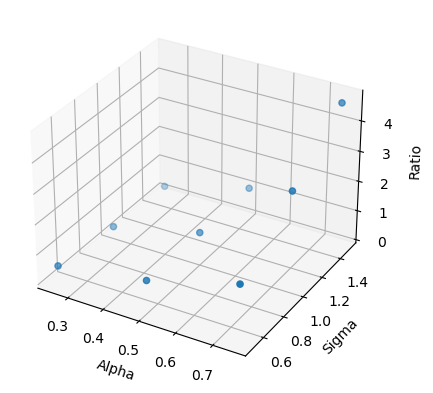

In [2]:
# We define the parameters alpha and sigma
alpha_varying = [0.25, 0.5, 0.75]
sigma_varying = [0.5, 1, 1.5]

# We store the results that we get
alphastore = []
sigmastore = []
ratiostore = []

# We create a simple loop for all the different values that we want to examine
for alpha in alpha_varying:
    for sigma in sigma_varying:

        # We call our model specifications
        HHclass = HouseholdSpecializationModelClass()

     # We set the correct values for the parameters
        HHclass.par.alpha = alpha
        HHclass.par.sigma = sigma

        # We solve the model
        opt = HHclass.solve_discrete()

        # We start by defining our the ratio between HF and HM
        ratio = opt.HF / opt.HM

        # We store the results
        alphastore.append(alpha)
        sigmastore.append(sigma)
        ratiostore.append(ratio)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alphastore, sigmastore, ratiostore)
ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('Ratio')
plt.show()


In [3]:
def print_table():
    #We define an empty text string to enter a title later
    text = ''

    # Creating the top header of the table. Alpha is values downward and Sigma to the right.
    text += f'{"Alpha - Sigma":3s}'
    for j, sigma in enumerate(sigma_varying):
       HHclass.par.sigma = sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" # creating a line shift 
    
    # Creating the body of the table
    for i, alpha in enumerate(alpha_varying):
        HHclass.par.alpha = alpha
        if i > 0:
            text += '\n' # creating a line shift
        text += f'{alpha:8.2f}    |' # creating the left header
        for j, sigma in enumerate(sigma_varying):
            HHclass.par.sigma=sigma
            opt = HHclass.solve_discrete()
            text += f'{opt.HF/opt.HM:7.2f}'
    
    # Print
    print(text)

print_table()

/var/folders/2m/pylrffks44n07rlh7fdg0nr00000gn/T/ipykernel_34745/3348222532.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/2m/pylrffks44n07rlh7fdg0nr00000gn/T/ipykernel_34745/3348222532.py:66: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/2m/pylrffks44n07rlh7fdg0nr00000gn/T/ipykernel_34745/3348222532.py:70: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


Alpha - Sigma    0.50    1.00    1.50
----------------------------------------
    0.25    |   0.55   0.31   0.21
    0.50    |   1.00   1.00   1.00
    0.75    |   1.83   3.25   4.67


# Question 2

Explain your code and procedure

/var/folders/2m/pylrffks44n07rlh7fdg0nr00000gn/T/ipykernel_34745/3348222532.py:70: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]


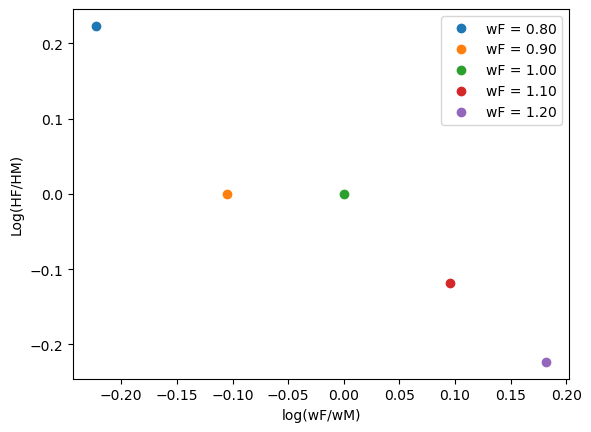

In [4]:
HHclass = HouseholdSpecializationModelClass()

# We define our vector wF
wF_varying = [0.8, 0.9, 1, 1.1, 1.2]

#Store the wF values
wFstore = []

#Creating a loop for the different values
for wF in wF_varying:
    HHclass.par.wF = wF

    # Solve
    opt2 = HHclass.solve_discrete()

    # Define the log function
    logratio = np.log(opt2.HF/opt2.HM)

    # Plotting
    plt.plot(np.log(wF/HHclass.par.wM), logratio, 'o', label=f'wF = {wF/HHclass.par.wM:.2f}')

    # Storing results
    wFstore.append(logratio)

# Customizing plot 
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.legend()

# Printing
print(wFstore)
plt.show()


# Question 3

Explain your code and procedure

In [5]:
# Using the model to calculate optimal HF and HM
HHclass = HouseholdSpecializationModelClass()

# Looping over wF values
for wF in wF_varying:
    
    # Setting value 
    HHclass.par.wF = wF

    # Solving for discrete optimal choice
    opt3 = HHclass.solve_continuous()

    # Creating Ratio 
    ratio = opt3.HF/opt3.HM

    # Plotting 
    plt.plot(np.log(wF/HHclass.par.wM), np.log(ratio), 'o', label=f'wF = {wF/HHclass.par.wM:.2f}')

# Customizing plot 
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.legend()

# Printing
plt.show()

AttributeError: 'HouseholdSpecializationModelClass' object has no attribute 'solve_obj'

ADD CONCISE CONLUSION.